<a href="https://colab.research.google.com/github/abderrahmaneaziri/astar/blob/main/astar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

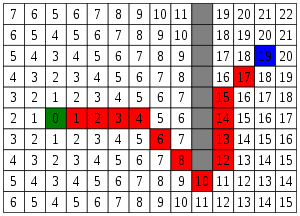

Disons que node(0) est notre position de départ et node(19) est notre position finale. Disons aussi que notre nœud actuel est au nœud du carré rouge (4)
G est la distance entre le nœud courant et le nœud de départ.
Si nous comptons en arrière, nous pouvons voir que le nœud (4) est à 4 espaces de notre nœud de départ.

Nous pouvons également dire que G est 1 de plus que notre nœud parent (nœud (3)). Donc dans ce cas pour node(4), currentNode.g = 4.
H est l'heuristique — distance estimée entre le nœud actuel et le nœud final.
Appliquons le théorème de Pythagore ! a² + b² = c². Après avoir appliqué cela, nous verrons que currentNode.h = 7² + 3². Ou currentNode.h = 58.
F est le coût total du nœud.
Additionnons donc h et g pour obtenir le coût total de notre nœud. NoeudCourant.f = NoeudCourant.g + NodeCourant.h. Ou currentNode.f = 4+ 58. Ou currentNode.f = 62.
f = g + h

Avec cette nouvelle valeur f, nous pouvons regarder tous nos nœuds et dire : "Quel est le meilleur nœud que je puisse choisir pour avancer maintenant ?". Plutôt que de parcourir chaque nœud, nous pouvons choisir ceux qui ont les meilleures chances de nous amener à notre objectif.
Voici un graphique pour illustrer. En haut, nous avons l'algorithme de Dijkstra, qui recherche sans cette valeur f, et en dessous, nous avons A* qui utilise cette valeur f.


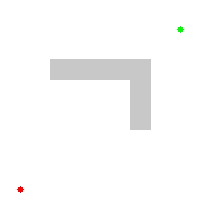

Dijkstra’s Algorithm (Wikipedia)

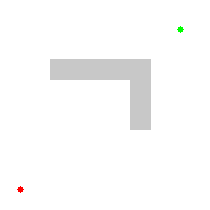

A* Algorithm (Wikipedia)

# Algorithme de Dijkstra
Donc, en regardant l'algorithme de Dijkstra, nous voyons qu'il continue de chercher. Il n'a aucune idée du "meilleur" nœud, il calcule donc les chemins pour tous.
# A* Algorithm
With A*,we see that once we get past the obstacle, the algorithm prioritizes the node with the lowest f and the ‘best’ chance of reaching the end.

In [27]:
# Celui qui a concu ce code: Nicholas Swift
# trouvé sur https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2
from warnings import warn
import heapq

class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position
    
    def __repr__(self):
      return f"{self.position} - g: {self.g} h: {self.h} f: {self.f}"

    # defining less than for purposes of heap queue
    def __lt__(self, other):
      return self.f < other.f
    
    # defining greater than for purposes of heap queue
    def __gt__(self, other):
      return self.f > other.f

def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(maze, start, end, allow_diagonal_movement = False):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    :param maze:
    :param start:
    :param end:
    :return:
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Heapify the open_list and Add the start node
    heapq.heapify(open_list) 
    heapq.heappush(open_list, start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
          # if we hit this point return the path such as it is
          # it will not contain the destination
          warn("giving up on pathfinding too many iterations")
          return return_path(current_node)       
        
        # Get the current node
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []
        
        for new_position in adjacent_squares: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child.position == open_node.position and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            heapq.heappush(open_list, child)

    warn("Couldn't get a path to destination")
    return None

def example(print_maze = True):

    maze = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,] * 2,
            [0,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,] * 2,
            [0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,] * 2,
            [0,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,] * 2,
            [0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0,1,1,] * 2,
            [0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,0,1,0,0,0,] * 2,
            [0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,] * 2,
            [0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,0,] * 2,
            [0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,] * 2,
            [0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,] * 2,
            [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,] * 2,]
    
    start = (0, 0)
    end = (len(maze)-1, len(maze[0])-1)

    path = astar(maze, start, end)

    if print_maze:
      for step in path:
        maze[step[0]][step[1]] = 2
      
      for row in maze:
        line = []
        for col in row:
          if col == 1:
            line.append("\u2588")
          elif col == 0:
            line.append(" ")
          elif col == 2:
            line.append(".")
        print("".join(line))

    print(path)


In [28]:
example()

..............█                             █               
             .█                             █               
         .....█                             █               
      ....█████          ............   █████          ...  
   ██ .████   █          .█      ██ .████   █          .█.  
   █...█ .....█    .......█ █    █...█ .....█    .......█.█ 
   █.████.██ .███ ..███████      █.████.██ .███ ..███████...
   █.█   ..█ ...██.█      ███    █.█   ..█ ...██.█      ███.
   █.██ ██.███ ....█  █████      █.██ ██.███ ....█  █████...
   █.█   ..  ███████    █ █ ██   █.█   ..  ███████    █ █.██
   █.█ ██.████  ███████ █ █      █.█ ██.████  ███████ █ █...
   █.█   .█         █   █ ███    █.█   .█         █   █ ███.
   █.████.█  ███ ████ ███ █      █.████.█  ███ ████ ███ █...
   █....█.     █          █ ██   █....█.     █          █.██
   █   ...  █     █       █      █   ...  █     █       █...
█████████████████████████████ █████████████████████████████.
[(0, 0), (0, 1), (0, 2),

# Explication étape par étape du code :

Le code commence par créer deux nœuds, début et fin.
 Le nœud de début est initialisé avec la position du début et son parent est défini sur Aucun.
 Le nœud de fin est initialisé avec la position de la fin et son parent est défini sur Aucun.
 Ensuite, une liste appelée open_list sera créée qui contiendra tous les chemins possibles du début à la fin dans l'ordre.
 Une deuxième liste appelée liste_fermée sera également créée et ne contiendra que les chemins qui ont été trouvés jusqu'à présent ainsi que leurs parents respectifs (début ou fin).

 Par la suite alors il va parcourir chaque carré du labyrinthe jusqu'à ce qu'il en trouve un où open_list et closed_list sont vides.
 Cela signifie que cette case particulière a déjà été atteinte, nous pouvons donc arrêter la recherche pour le moment.
 Ensuite, un compteur d'itérations externe commence à 0 tandis qu'un compteur de nombre maximum d'itérations commence à len(maze) * len(maze) // 2 car il y a toujours deux carrés entre une paire donnée de nœuds sur le labyrinthe lorsque on utilise A * Algorithme de recherche de chemin.
 Une fois ces variables définies, elles seront utilisées plus tard dans la fonction astar() qui renvoie un chemin du début à la fin ainsi que des informations sur le nombre de fois qu'il a été recherché lors de chaque tentative de recherche

 aprés il va créer une liste de tous les nœuds du labyrinthe.
 Il parcourt ensuite chaque nœud et vérifie s'il se trouve sur la liste ouverte ou la liste fermée.
 S'il est sur la liste ouverte, il crée un nouveau nœud avec sa position comme celle du nœud actuel plus une étape pour créer un carré adjacent.
 Le code continue de le faire jusqu'à ce qu'il atteigne sa destination qui sera à end_node.
 si non la fonction renvoie None car aucun chemin n'a été trouvé de start_node à end_node
 heapq est un module de fonction qui est utilisé pour trouver un chemin d'un nœud à un autre.
 par la suite commence par créer une liste ouverte et une liste fermée.
 La liste ouverte contiendra les nœuds qui ne sont pas sur la liste fermée, tandis que la liste fermée contiendra les nœuds qui sont sur la liste ouverte.
 Ensuite, il crée deux boucles for.
 La première boucle parcourt les carrés adjacents afin de créer de nouveaux nœuds à chaque position du labyrinthe.
 La deuxième boucle parcourt tous les enfants de chaque nœud afin de créer des valeurs f, g et h pour chaque enfant, ainsi que de vérifier s'il s'agit d'un terrain praticable ou non avant de les ajouter aux listes ouvertes ou fermées en conséquence.

In [33]:
#Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)
 
# Driver program
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
           ]

 
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


Explication du code :


 La fonction dijkstra implémente l'algorithme de chemin le plus court à source unique de Dijkstra pour un graphique représenté à l'aide d'une représentation matricielle d'adjacence et prend en entrée src (le point de départ) et dist (valeurs de distance).
 
 Le code est un programme Python pour l'algorithme de chemin le plus court à source unique de Dijkstra pour la représentation matricielle d'adjacence du graphe.
 Le code commence par définir la classe Graph, qui contient deux méthodes : __init__ et printSolution.
 La méthode __init__ initialise le graphe avec des sommets, tandis que la méthode printSolution imprime les informations sur les sommets et les distances à partir de la source.
 Une fonction utilitaire pour trouver le sommet avec la valeur de distance minimale, à partir de l'ensemble des sommets non encore inclus dans l'arbre du chemin le plus court est définie ainsi qu'une fonction qui implémente l'algorithme du chemin le plus court


# Comparaison 
A * est comme Dijkstra, la seule différence est que A * essaie de rechercher un meilleur chemin en utilisant une fonction heuristique qui donne la priorité aux nœuds censés être meilleurs que les autres tandis que Dijkstra explore simplement tous les chemins possibles.

Son optimalité dépend de la fonction heuristique utilisée, donc oui, elle peut renvoyer un résultat non optimal à cause de cela et en même temps améliorer l'heuristique pour votre mise en page spécifique, et meilleurs seront les résultats (et éventuellement la vitesse).

Il se veut plus rapide que Dijkstra même s'il nécessite plus de mémoire et plus d'opérations par nœud puisqu'il explore beaucoup moins de nœuds et le gain est bon dans tous les cas.

Le précalcul des chemins peut être le seul moyen si vous avez besoin de résultats en temps réel et que le graphique est assez volumineux, mais vous souhaitez généralement rechercher le chemin moins fréquemment (je suppose que vous souhaitez le calculer souvent).